In [1]:
# %load spectral.py
#!/usr/bin/env python
%reload_ext autoreload
import os
clear = lambda: os.system('cls')  # On Windows System
clear()

32512

In [2]:
# %load spectral.py
#!/usr/bin/env python

#import os
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import os.path
#%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns 
import cmocean
import sys
import palettable
import time
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import ticker
import ioeddy as io
import math
import json
from scipy.interpolate import interp1d
#from ioeddy import readpln

# -----------------------------------------------------------------------------------------
# specify path of the pln files
path = '../plnfiles/'
stride = 50
#write_file 
# preferred plot range
pref_x=[-1500,5000]
pref_y=[0,1200]
num_files = 30000
drhodz = 0
save_file = True

num_cycles = 15
# ------------------------------------------------------------------------------------------
# The specific file number start
file_number =30000 #8450
file_header_1= 'omgx_i0038' + '_n'
# ----------------------------------------------------------------------------------------

D = 500
U = 0.1
Uc = 0.1
omega_f = 0.0025/(2*math.pi)

# Problem specific
# supply (x,y) values
# x-  streamwise and y - vertical
#probe_loc =  [[250,-150],[220,-130],[500,0],[500,50],[500,-100],[750,-50],[2250,-150],[1000,-150], \
#              [1000,190],[-1000,1700]]
probe_loc =  [[2250,0],[250,-100],[220,-130],[300,0],[500,50],[500,-100],[750,-50],[2250,-150],[1000,-150], [210,-100],\
              [500,0],[750,0],[1000,0],[1250,0],[1750,0],[2750,0],[3250,0],[2000,0],[3000,0],[2500,0],\
              [500,80],[750,80],[1250,80],[1700,80], [2100,80],[2600,90]]
#probe_loc= [[1700,280],[2811,-190],[277,-10]]
#probe_loc=[[2200,175],[1500,-166],[550,-4]]

probe_indices = np.zeros([len(probe_loc),len(probe_loc[0])],dtype=int) 

nprobe = len(probe_loc)
time = np.zeros((num_files,), dtype=int)
probe_data = np.zeros((nprobe,num_files))

for i in range(len(probe_loc)):
    print("Probe locations : x=", probe_loc[i][0]," and y=" , probe_loc[i][1])
    

Probe locations : x= 2250  and y= 0
Probe locations : x= 250  and y= -100
Probe locations : x= 220  and y= -130
Probe locations : x= 300  and y= 0
Probe locations : x= 500  and y= 50
Probe locations : x= 500  and y= -100
Probe locations : x= 750  and y= -50
Probe locations : x= 2250  and y= -150
Probe locations : x= 1000  and y= -150
Probe locations : x= 210  and y= -100
Probe locations : x= 500  and y= 0
Probe locations : x= 750  and y= 0
Probe locations : x= 1000  and y= 0
Probe locations : x= 1250  and y= 0
Probe locations : x= 1750  and y= 0
Probe locations : x= 2750  and y= 0
Probe locations : x= 3250  and y= 0
Probe locations : x= 2000  and y= 0
Probe locations : x= 3000  and y= 0
Probe locations : x= 2500  and y= 0
Probe locations : x= 500  and y= 80
Probe locations : x= 750  and y= 80
Probe locations : x= 1250  and y= 80
Probe locations : x= 1700  and y= 80
Probe locations : x= 2100  and y= 80
Probe locations : x= 2600  and y= 90


In [3]:
# ------------------------------------------------------------------------------------------

#os.environ['PATH'] = os.environ['PATH'] + ':/Library/TeX/texbin/'


fss = 12; 
fsl = 15; 
# This is just set up for plotting the figure
#
sns.set_context('paper')
sns.set(color_codes=True, font_scale=20)

sns.set_palette('PuBuGn_d')
sns.set_style('ticks', {'font.family'     : ['serif'],
                        'font.serif'      : ['Times'],
                        'xtick.major.size': 20.0,
                        'xtick.minor.size': 15,
                        'ytick.major.size': 20,
                        'ytick.minor.size': 15,
                        'axes.edgecolor'  : 'k',
                        'axes.labelcolor' : 'k',
                        'text.color'      : 'k',
                        'xtick.color'     : 'k',
                        'ytick.color'     : 'k',
                        'image.cmap'      : 'PuBuGn'})

# This is just set up for plotting the figure
#

plt.rc('figure', figsize=[8.0, 5.0])

plt.rc('mathtext', fontset='stix')

plt.rc('axes', linewidth=1.0)
plt.rc('xtick.major', width=1.0)
plt.rc('ytick.major', width=1.0)
plt.rc('xtick.minor', width=1.0)
plt.rc('ytick.minor', width=1.0)

plt.rc('font', size=fss)
plt.rc('xtick', labelsize=fss)
plt.rc('ytick', labelsize=fss)
plt.rc('axes', labelsize=fsl)

plt.rc('axes', titlesize=fss)
plt.rc('lines', linewidth=2.0)
plt.rc('lines', markersize=7.0)

plt.rc('pdf', fonttype=3)
plt.rc('ps', fonttype=3)
plt.rc('text', usetex=True)

plt.rc('font',**{'family':'serif','serif':['Times']})

plt.rc('text.latex', preamble=[r"\usepackage[T1]{fontenc}", r"\usepackage{amsmath}"])

In [4]:
filename_1   =  path + file_header_1 + '%08d'%file_number + '.pln'
print(filename_1)
exists = os.path.isfile(filename_1)
if not exists:
    print('Broken')
    

    # Function ioeddy has been used for pln read
my_plane_1 = io.readpln(filename_1)

# The nx and ny values
# x is always streamwise
# y is always vertical
# Only for plotting purposes

np1    = my_plane_1['np1'   ][0]
np2    = my_plane_1['np2'   ][0]

#grid
# 

gc1 = my_plane_1['gc1'][0]
gc2 = my_plane_1['gc2'][0]

#data
# yedges has the spatial coordinates of 2nd grid
yedges = gc1
# xedges has the spatial coordinates of 1st grid
xedges = gc2
# These are different from conventions used in the code. 
# Just for temporary plotting
for i in range(len(probe_indices)):
    probe_indices[i][0]= io.loc(probe_loc[i][0],xedges)
    probe_indices[i][1]= io.loc(probe_loc[i][1],yedges)
    print("Probe locations : i=", probe_indices[i][0]," and j=" , probe_indices[i][1])

../plnfiles/omgx_i0038_n00030000.pln
Reading correct
Probe locations : i= 1261  and j= 640
Probe locations : i= 517  and j= 607
Probe locations : i= 500  and j= 597
Probe locations : i= 547  and j= 640
Probe locations : i= 665  and j= 657
Probe locations : i= 665  and j= 607
Probe locations : i= 813  and j= 624
Probe locations : i= 1261  and j= 590
Probe locations : i= 960  and j= 590
Probe locations : i= 494  and j= 607
Probe locations : i= 665  and j= 640
Probe locations : i= 813  and j= 640
Probe locations : i= 960  and j= 640
Probe locations : i= 1070  and j= 640
Probe locations : i= 1188  and j= 640
Probe locations : i= 1312  and j= 640
Probe locations : i= 1353  and j= 640
Probe locations : i= 1228  and j= 640
Probe locations : i= 1334  and j= 640
Probe locations : i= 1288  and j= 640
Probe locations : i= 665  and j= 667
Probe locations : i= 813  and j= 667
Probe locations : i= 1070  and j= 667
Probe locations : i= 1179  and j= 667
Probe locations : i= 1242  and j= 667
Probe loca

In [5]:
count = 0
while True:

    
    dirext = ''

    
    filename_1   =  path + file_header_1 + '%08d'%file_number + '.pln'
    print(filename_1)
    exists = os.path.isfile(filename_1)
    if not exists:
        print('Broken')
        count = count -1
        break

    # Function ioeddy has been used for pln read

    my_plane_1 = io.readpln(filename_1)

    # The nx and ny values
    # x is always streamwise
    # y is always vertical
    # Only for plotting purposes

    np1    = my_plane_1['np1'   ][0]
    np2    = my_plane_1['np2'   ][0]

    #grid
    # 

    gc1 = my_plane_1['gc1'][0]
    gc2 = my_plane_1['gc2'][0]
     
    # time
    time[count] =my_plane_1['time'][0]
    
    #data
    raw_data_1 = my_plane_1['data'][0]

    data_1 = np.reshape(raw_data_1,(np1,np2),order='F')

    # yedges has the spatial coordinates of 2nd grid
    yedges = gc1
    # xedges has the spatial coordinates of 1st grid
    xedges = gc2


    for i in range(nprobe):
        probe_data[i][count] = data_1[ probe_indices[i][1] ][ probe_indices[i][0] ]


    file_number=file_number+stride  


    if count==0 :
        init_cycle = (time[count]*omega_f)
        cycle_breaker = num_cycles + init_cycle
        
#    plt.show()
    count = count+1 
    if count >= num_files:
        print('Count exceeds num_files')
        save_file = True
        count = count -1
        break
        
    if time[count-1]*omega_f > cycle_breaker:
        print('No. of cycles limit :',num_cycles)
        count = count-1
        break
        

../plnfiles/omgx_i0038_n00030000.pln
Reading correct
../plnfiles/omgx_i0038_n00030050.pln
Reading correct
../plnfiles/omgx_i0038_n00030100.pln
Reading correct
../plnfiles/omgx_i0038_n00030150.pln
Reading correct
../plnfiles/omgx_i0038_n00030200.pln
Reading correct
../plnfiles/omgx_i0038_n00030250.pln
Reading correct
../plnfiles/omgx_i0038_n00030300.pln
Reading correct
../plnfiles/omgx_i0038_n00030350.pln
Reading correct
../plnfiles/omgx_i0038_n00030400.pln
Reading correct
../plnfiles/omgx_i0038_n00030450.pln
Reading correct
../plnfiles/omgx_i0038_n00030500.pln
Reading correct
../plnfiles/omgx_i0038_n00030550.pln
Reading correct
../plnfiles/omgx_i0038_n00030600.pln
Reading correct
../plnfiles/omgx_i0038_n00030650.pln
Reading correct
../plnfiles/omgx_i0038_n00030700.pln
Reading correct
../plnfiles/omgx_i0038_n00030750.pln
Reading correct
../plnfiles/omgx_i0038_n00030800.pln
Reading correct
../plnfiles/omgx_i0038_n00030850.pln
Reading correct
../plnfiles/omgx_i0038_n00030900.pln
Reading c

Probe locations : x= 2250  and y= 0
37713
Interpolated grid size: 256
255.0
1.0
Probe locations : x/D = 4.5  and y= 0.0


/home/pranav/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/pranav/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


Start phase :  64.74622028657168
End phase :  79.7517462086333


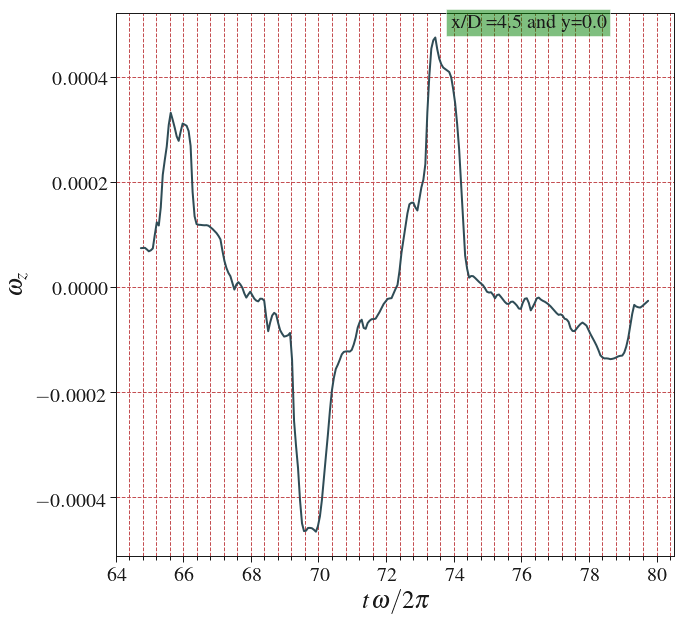

In [6]:
n = 0
window = False



print("Probe locations : x=", probe_loc[n][0]," and y=" , probe_loc[n][1])
dt= time[1:count]-time[0:count-1]
#plt.plot(time[0:count], probe_data[4][0:count]) 
#print(dt)

var = probe_data[n][0:count]


varmean = np.mean(var)
var = var-varmean

dt_min = np.amin(dt)

num = dt_min/omega_f
dt_min = np.ceil(num)*omega_f
print(time[count]-time[0])


interpSize = (time[count]-time[0])/dt_min
new_data_size = int(io.nextpow2(interpSize))

time_new = np.linspace(time[0],time[count],num=new_data_size)

var_new = interp1d(time[0:count],var,fill_value="extrapolate") (time_new)

print('Interpolated grid size:',new_data_size)


dt_new = time_new[1]-time_new[0]
Fs = 1/dt_new

print(np.rint((time_new[-1]-time_new[0])*Fs))
nfft = int(np.rint((time_new[-1]-time_new[0])*Fs))

print(Fs*dt_new)
out = "x/D =" + str(probe_loc[n][0]/D) + " and y=" + str(probe_loc[n][1]/D)
if (window) :
    w = np.hanning(new_data_size)
    var_new = np.multiply(var_new,w)
   
# Y = np.fft.fft(var_new)
# P_two = abs(Y)#2*np.multiply(Y,np.conjugate(Y))/(new_data_size*Fs)

# S_uu = P_two[1: int(new_data_size/2)+1]
# f = Fs*range(int(new_data_size/2))/new_data_size


# Use FFT to get the amplitude of the spectrum
ampl = 2/nfft * (np.absolute(np.fft.fft(var_new)))**2

# FFT frequency bins
freqs = np.fft.fftfreq(nfft, 1/Fs)
freqs = np.fft.fftshift(freqs)/omega_f
ampl = np.fft.fftshift(ampl[0:nfft])

#--------------------------------------------------------------
fig1, ax1 = plt.subplots(1,1,figsize=(10,10))
ax1.plot(time_new*omega_f, var_new)
plt.grid(which='both',axis='both',color='r', linestyle='--', linewidth=1)
ax1.tick_params(axis='x', which='minor', bottom=True,labelsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
#plt.tick_params(axis='both', which='minor', labelsize=8)
ax1.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))
plt.xlabel('$t\omega/2\pi$', fontsize=25)
plt.ylabel('$\omega_z$', fontsize=25)
plt.text(0.6, 1,out,horizontalalignment='left',verticalalignment='top',transform=ax1.transAxes,fontsize=20,
        bbox=dict(facecolor='green', alpha=0.5))

print("Probe locations : x/D =", probe_loc[n][0]/D," and y=" , probe_loc[n][1]/D)
fig1.savefig('./' + 'Time_plot_omgx' + '_Pr' + str(n) + '.png')


print('Start phase : ', time_new[0]*omega_f)
print('End phase : ', time_new[-1]*omega_f)

In [7]:
#
#print('Start phase : ', time[0:count]*omega_f)

/home/pranav/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


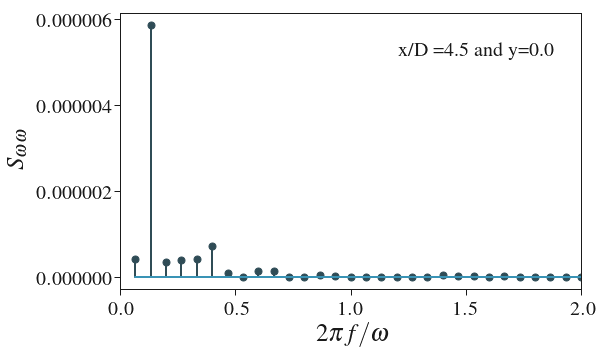

In [8]:

ind = freqs > 0

real_freq = freqs[ind]
real_ampl = ampl[ind]

#print(f)

 
plt.stem(real_freq, real_ampl)
ax = plt.gca()
#plt.margins(0.1, 0.1)
plt.xlabel('$2\pi f/\omega$', fontsize=25)
plt.ylabel('$S_{\omega \omega}$', fontsize=25)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlim(0,2)
plt.text(0.6, 0.9,out,horizontalalignment='left',verticalalignment='top',transform=ax.transAxes,fontsize=20)
plt.gcf().savefig('./' + 'Soo_stem' + '_Pr' + str(n) + '.png')
plt.show()


Probe locations : x/D = 4.5  and y= 0.0


/home/pranav/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


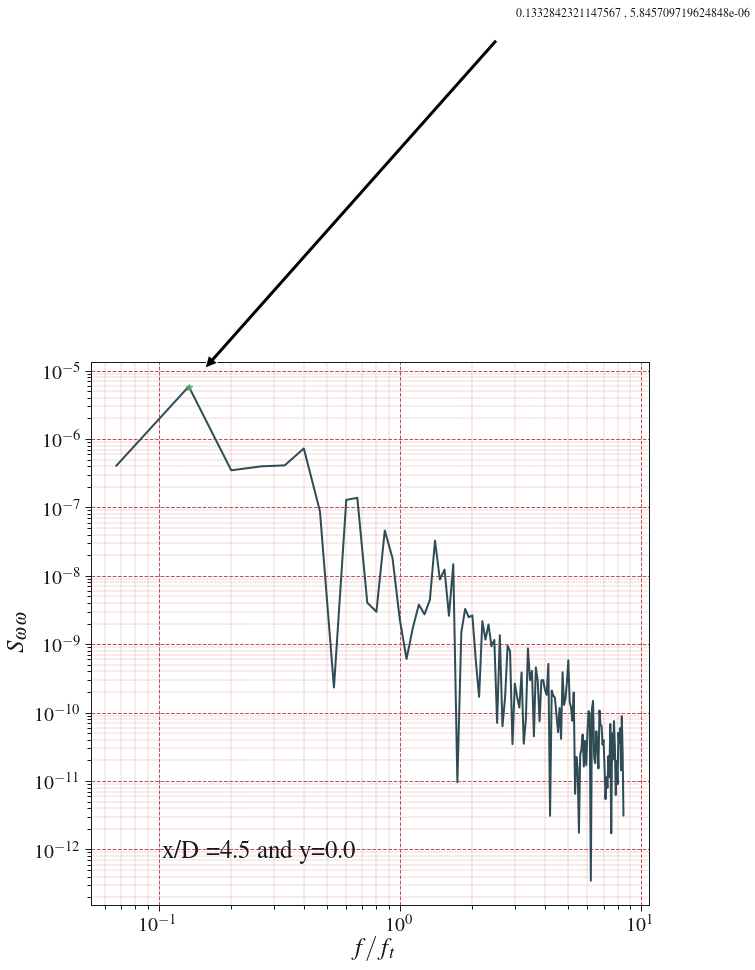

In [9]:

fig2, ax2 = plt.subplots(1,1,figsize=(10,10))
i = np.unravel_index(np.argmax(real_ampl, axis=None), real_ampl.shape)

ax2.loglog(real_freq,real_ampl)
ax2.loglog(real_freq[i],real_ampl[i],'g*')
plt.grid(which='major',axis='both',color='r', linestyle='--', linewidth=1)
plt.grid(which='minor',axis='both',color='r', linestyle='--', linewidth=.3)
ax2.annotate(str(real_freq[i])+' , '+str(real_ampl[i]), xy=(real_freq[i],real_ampl[i]), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05,clip_on=True),
            )
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('$f/f_t$', fontsize=25)
plt.ylabel('$S_{\omega \omega}$', fontsize=25)


print("Probe locations : x/D =", probe_loc[n][0]/D," and y=" , probe_loc[n][1]/D)

plt.text(0.3, 0.1,out,horizontalalignment='center',verticalalignment='center',
     transform = ax2.transAxes,fontsize=25)
fig2.savefig('./' + 'Spectra_omgx_' + '_Pr' + str(n) + '.png')

/home/pranav/anaconda3/lib/python3.7/site-packages/matplotlib/textpath.py:349: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/times/utmr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font.fname))
/home/pranav/anaconda3/lib/python3.7/site-packages/matplotlib/textpath.py:349: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/times/utmr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font.fname))
/home/pranav/anaconda3/lib/python3.7/site-packages/matplotlib/textpath.py:349: UserWarning: The glyph (50) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/times/utmr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font.fname))
/home/pranav/anaconda3/lib/python3.7/site-packages/matplotlib/textpath.py:349: UserWarning: The glyph (52) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/times/utmr8a.pfb

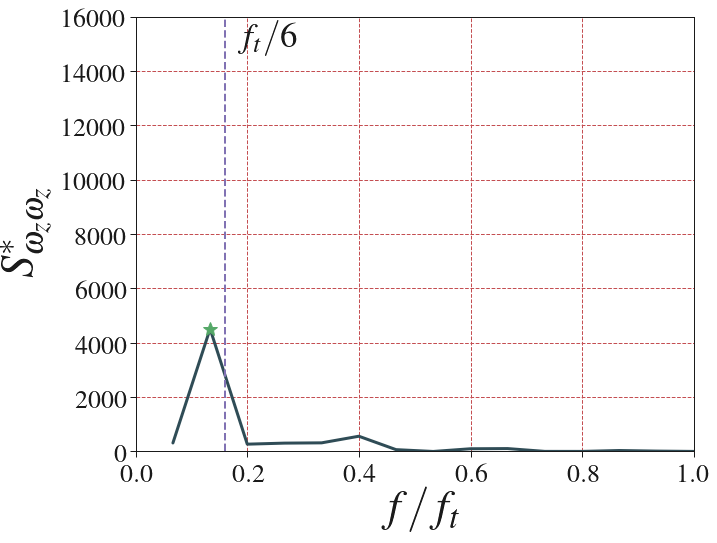

In [10]:


# fig2, ax2 = plt.subplots(1,1,figsize=(10,10))
# #maxvar = np.argmax(var_new)
# i = np.unravel_index(np.argmax(S_uu, axis=None), S_uu.shape)

# ax2.loglog(f/omega_f,S_uu)
# ax2.loglog(f[i]/omega_f,S_uu[i],'g*')
# plt.grid(which='major',axis='both',color='r', linestyle='--', linewidth=1)
# plt.grid(which='minor',axis='both',color='r', linestyle='--', linewidth=.3)
# ax2.annotate(str(2*math.pi*f[i]/omega_f)+' , '+str(S_uu[i]), xy=(2*math.pi*f[i]/omega_f, S_uu[i]), xytext=(3, 1.5),
#             arrowprops=dict(facecolor='black', shrink=0.05,clip_on=True),
#             )
# plt.tick_params(axis='both', which='major', labelsize=20)
# plt.xlabel('$2\pi f/\omega$', fontsize=20)

fi= 3.6*.00001

fig3, ax3 = plt.subplots(1,1,figsize=(10,8))
i = np.unravel_index(np.argmax(real_ampl, axis=None), real_ampl.shape)

ax3.plot(real_freq,real_ampl/(fi*fi),lw=3)
ax3.plot(real_freq[i],real_ampl[i]/(fi*fi),'g*',markersize=15)


ax3.text(0.18, 14700, '$f_t/6$', transform=ax3.transData, fontsize=35)

# line at 0.5ft
plt.plot([0.16, 0.16], [0, 55000],'m--',lw=2)

plt.grid(which='major',axis='both',color='r', linestyle='--', linewidth=1)
plt.grid(which='minor',axis='both',color='r', linestyle='--', linewidth=.3)

plt.tick_params(axis='both', which='major', labelsize=26)
plt.xlabel('$f/f_t$', fontsize=45)
plt.ylabel('$S^*_{\omega_z \omega_z}$', fontsize=45)

plt.xlim(0,1)
plt.ylim(0,16000)

#fig3.savefig('./' + 'Spectra_GRL_omgx_' + '_Pr' + str(n) + '.png',bbox_inches='tight',dpi=300)
fig3.savefig('./' + 'Spectra_GRL_omgx_' + '_Pr' + str(n) + '.svg',bbox_inches='tight',format='svg',dpi=600)